In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.neighbors import NearestNeighbors
from dowhy import CausalModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import shap


df = pd.read_csv(r'heart_2020_cleaned.csv')
print(df.head())
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)


  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

In [31]:
continuous_summary = {
    'Variable': [],
    'Mean': [],
    'Median': [],
    'Mode': [],
    'Min': [],
    'Max': [],
}

for col in ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']:
    continuous_summary['Variable'].append(col)
    continuous_summary['Mean'].append(df[col].mean())
    continuous_summary['Median'].append(df[col].median())
    continuous_summary['Mode'].append(df[col].mode()[0])
    continuous_summary['Min'].append(df[col].min())
    continuous_summary['Max'].append(df[col].max())

continuous_summary_df = pd.DataFrame(continuous_summary)
print(continuous_summary_df)


         Variable       Mean  Median   Mode    Min    Max
0             BMI  28.325399   27.34  26.63  12.02  94.85
1  PhysicalHealth   3.371710    0.00   0.00   0.00  30.00
2    MentalHealth   3.898366    0.00   0.00   0.00  30.00
3       SleepTime   7.097075    7.00   7.00   1.00  24.00


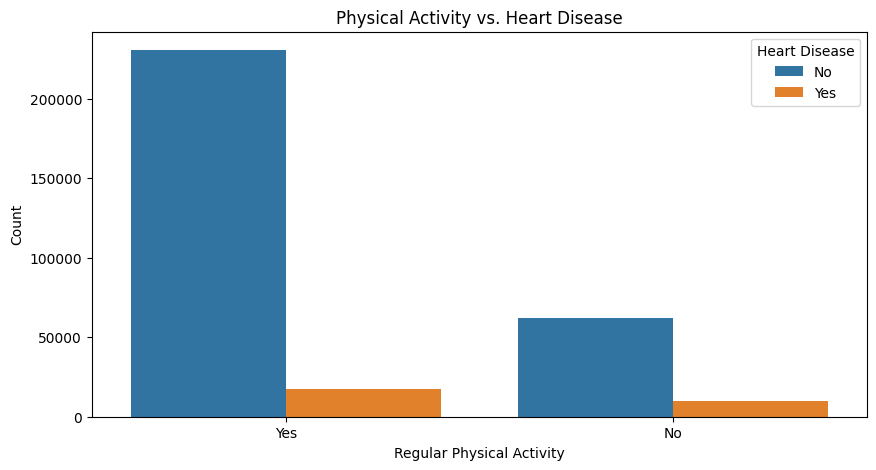

In [32]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="PhysicalActivity", hue="HeartDisease")
plt.title("Physical Activity vs. Heart Disease")
plt.xlabel("Regular Physical Activity")
plt.ylabel("Count")
plt.legend(title="Heart Disease")
plt.show()


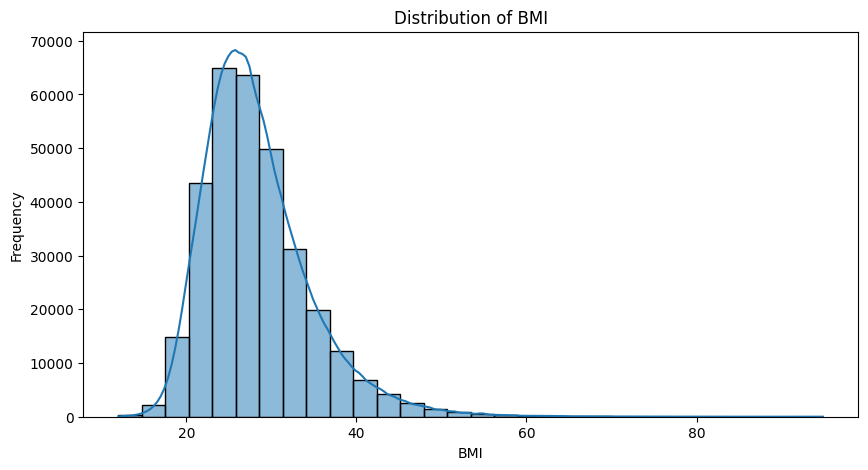

In [33]:
plt.figure(figsize=(10, 5))
sns.histplot(df["BMI"], kde=True, bins=30)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()


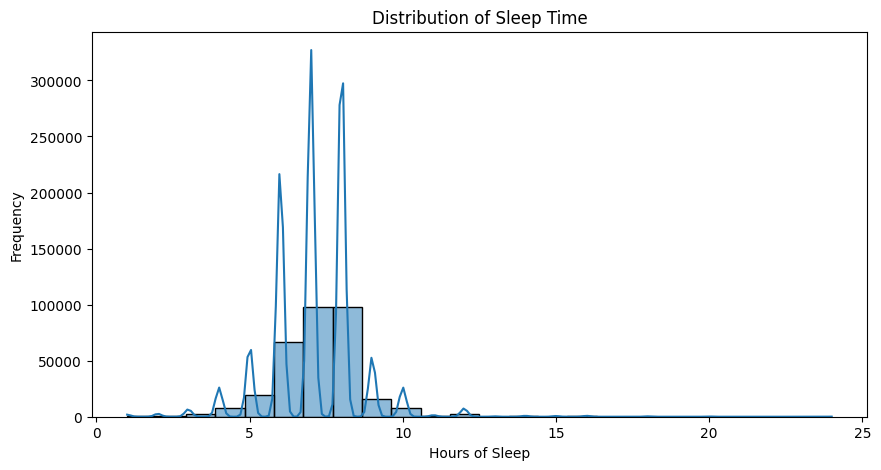

In [34]:
plt.figure(figsize=(10, 5))
sns.histplot(df["SleepTime"], kde=True, bins=24)
plt.title("Distribution of Sleep Time")
plt.xlabel("Hours of Sleep")
plt.ylabel("Frequency")
plt.show()


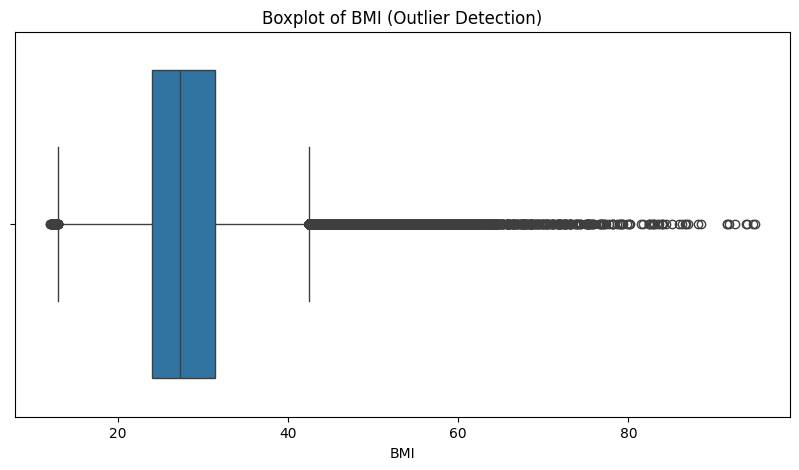

In [35]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["BMI"])
plt.title("Boxplot of BMI (Outlier Detection)")
plt.xlabel("BMI")
plt.show()


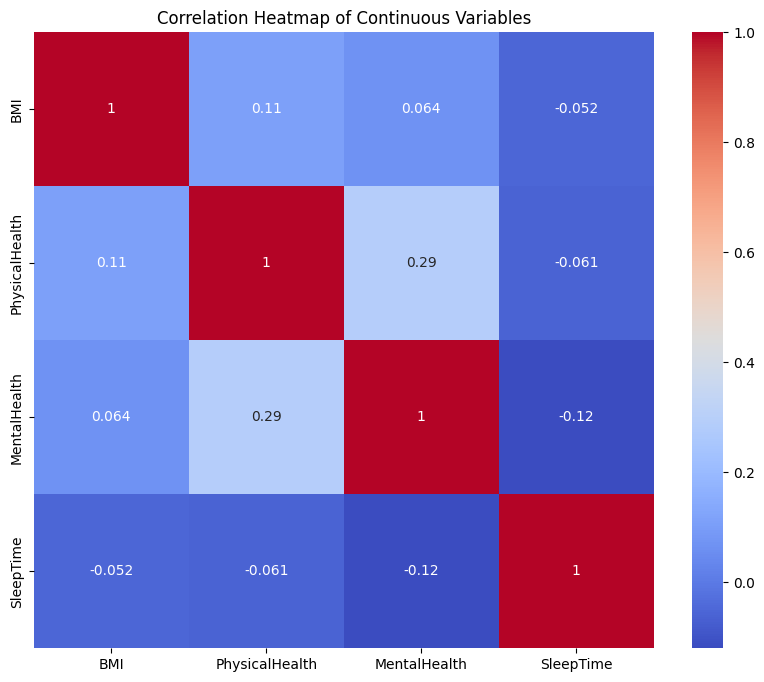

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Continuous Variables")
plt.show()


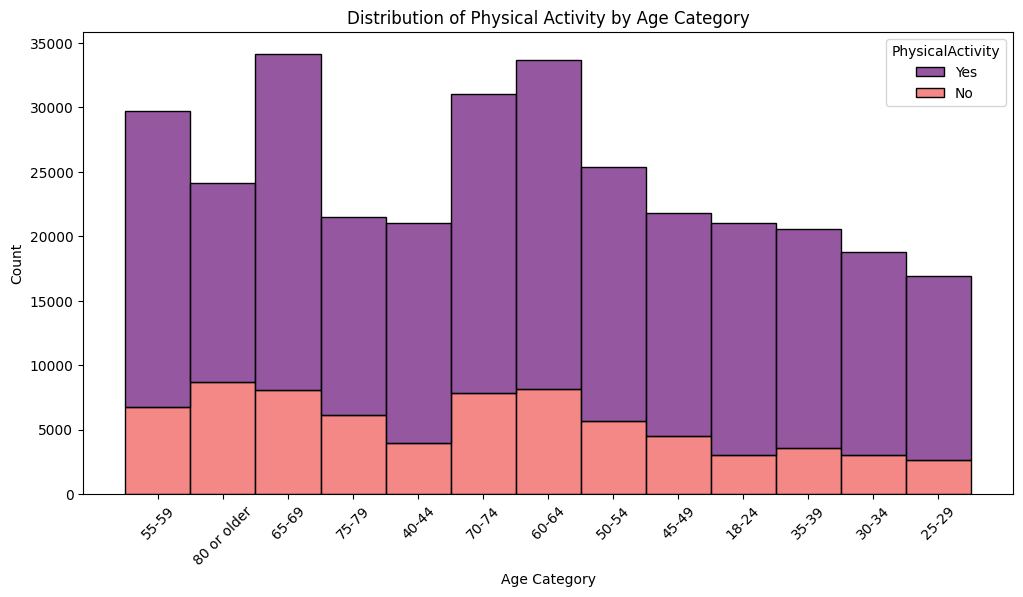

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="AgeCategory", hue="PhysicalActivity", multiple="stack", palette="magma")
plt.title("Distribution of Physical Activity by Age Category")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


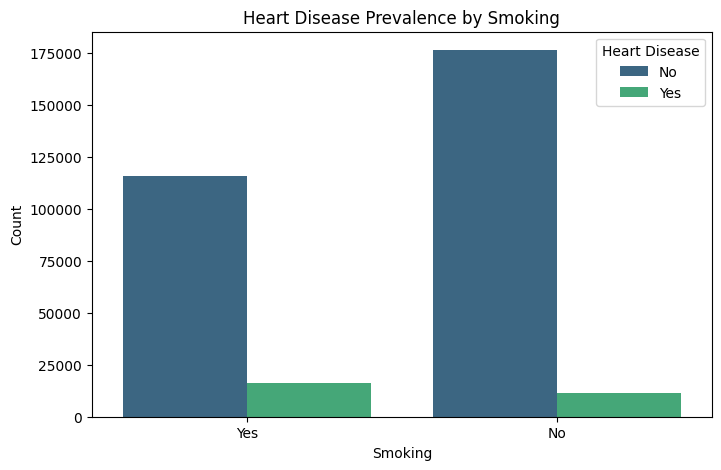

In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Smoking", hue="HeartDisease", palette="viridis")
plt.title("Heart Disease Prevalence by Smoking")
plt.xlabel("Smoking")
plt.ylabel("Count")
plt.legend(title="Heart Disease")
plt.show()


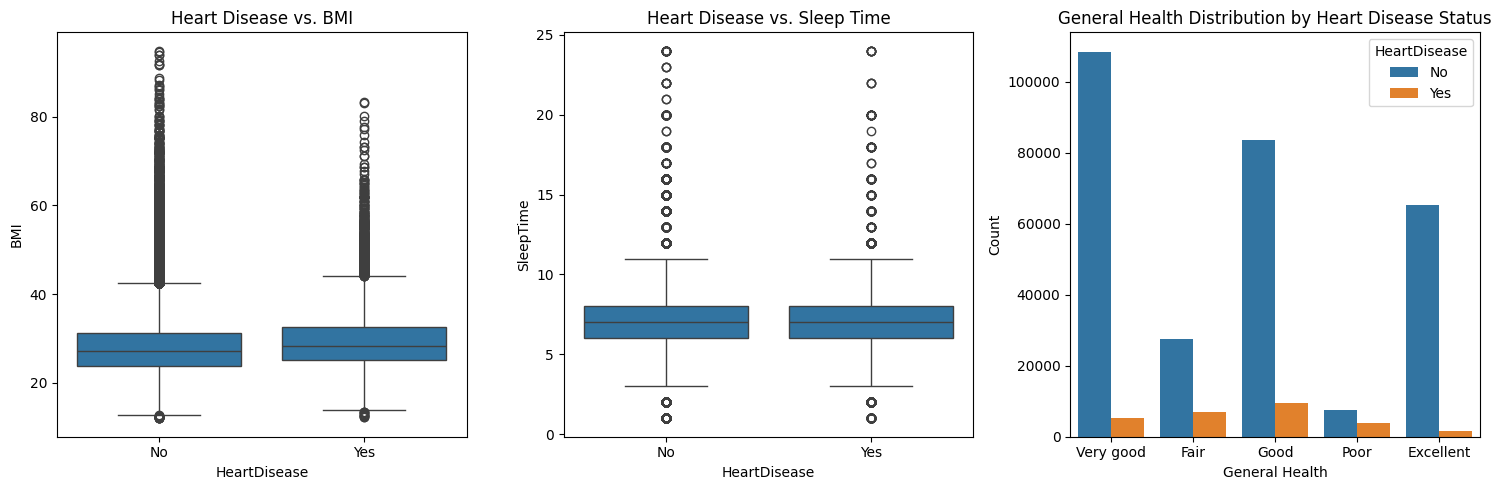

In [39]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x="HeartDisease", y="BMI")
plt.title("Heart Disease vs. BMI")

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x="HeartDisease", y="SleepTime")
plt.title("Heart Disease vs. Sleep Time")

plt.subplot(1, 3, 3)
sns.countplot(data=df, x="GenHealth", hue="HeartDisease")
plt.title("General Health Distribution by Heart Disease Status")
plt.xlabel("General Health")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


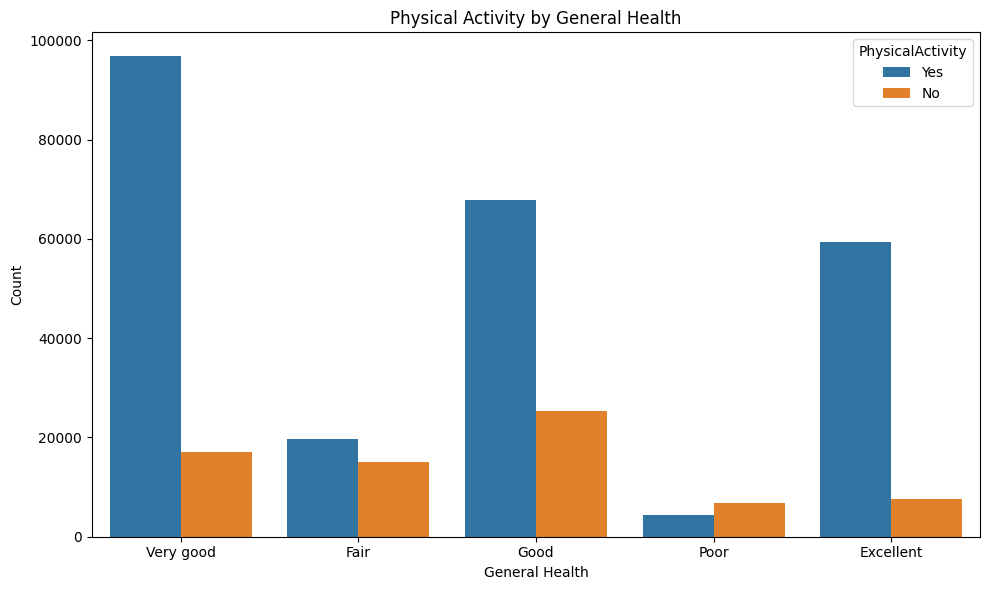

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="GenHealth", hue="PhysicalActivity")
plt.title("Physical Activity by General Health")
plt.xlabel("General Health")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

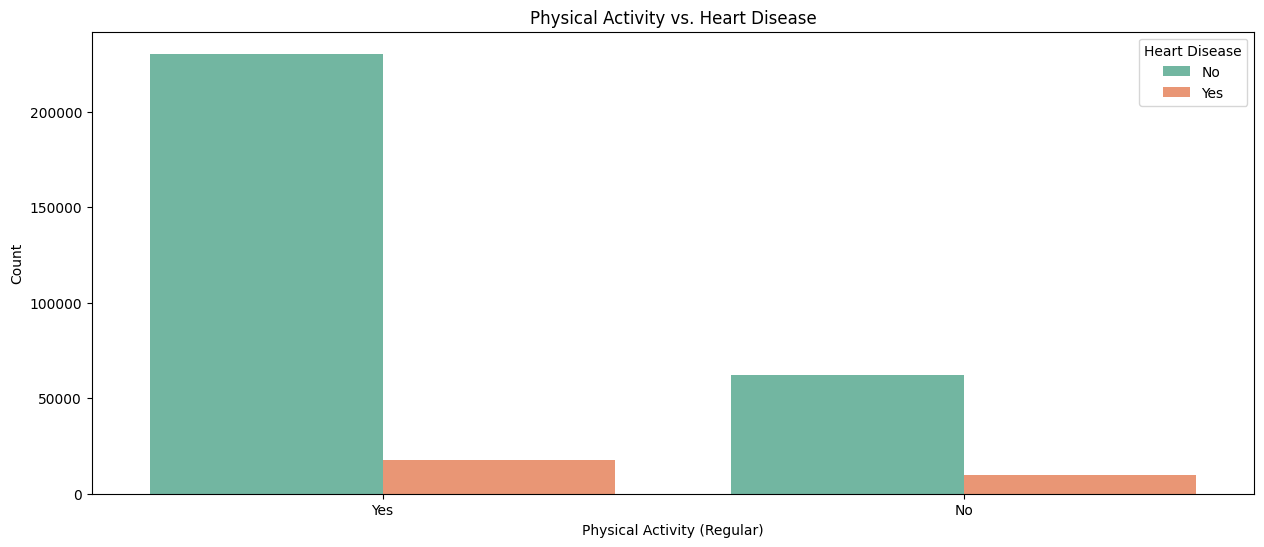

In [41]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="PhysicalActivity", hue="HeartDisease", palette="Set2", dodge=True)
plt.title("Physical Activity vs. Heart Disease")
plt.xlabel("Physical Activity (Regular)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()


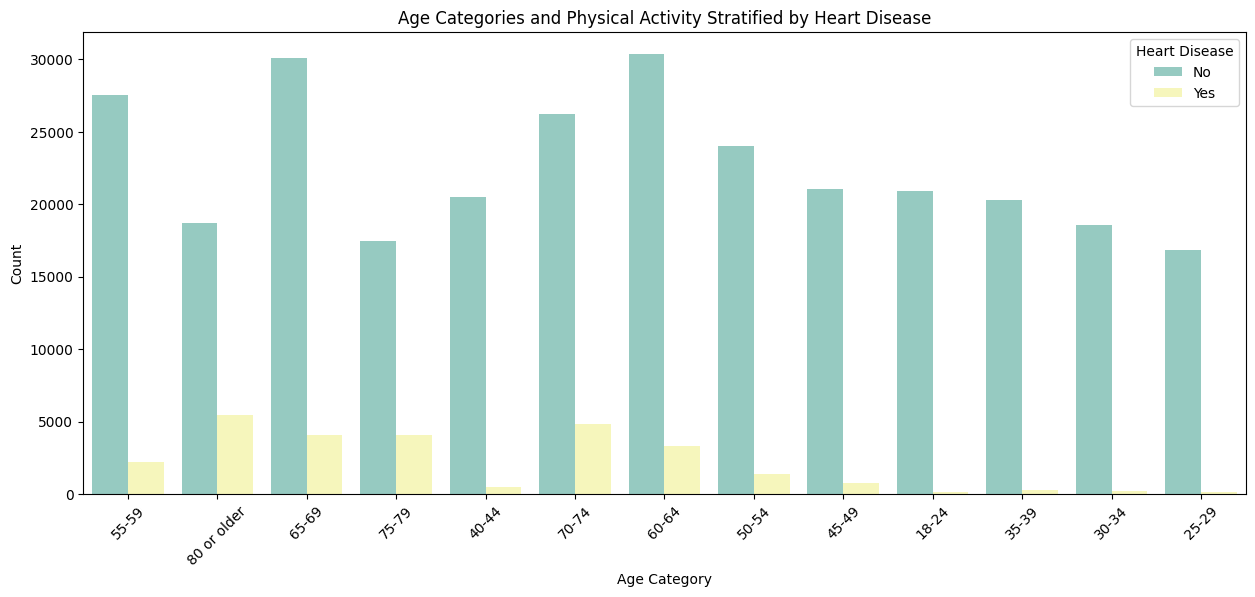

In [42]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="AgeCategory", hue="HeartDisease", palette="Set3")
plt.title("Age Categories and Physical Activity Stratified by Heart Disease")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()


C:\Users\ruthi\AppData\Local\Temp\ipykernel_7140\144276715.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="GenHealth", y="BMI", palette="pastel")


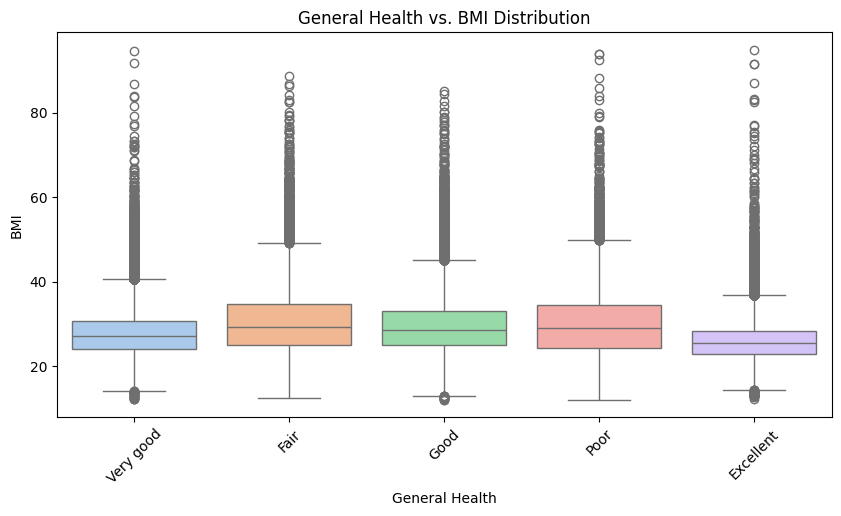

In [43]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="GenHealth", y="BMI", palette="pastel")
plt.title("General Health vs. BMI Distribution")
plt.xlabel("General Health")
plt.ylabel("BMI")
plt.xticks(rotation=45)
plt.show()


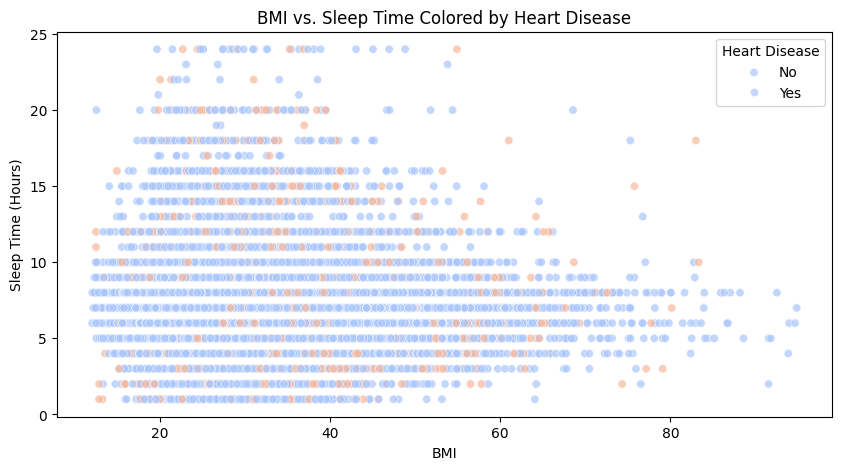

In [44]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="BMI", y="SleepTime", hue="HeartDisease", palette="coolwarm", alpha=0.7)
plt.title("BMI vs. Sleep Time Colored by Heart Disease")
plt.xlabel("BMI")
plt.ylabel("Sleep Time (Hours)")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()


In [45]:
print(df.columns)


Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


In [46]:
print(df['PhysicalActivity'].unique())


['Yes' 'No']


In [47]:
df['Overweight'] = (df['BMI'] >= 25).astype(int)
print(df[['BMI', 'Overweight']].head())


     BMI  Overweight
0  16.60           0
1  20.34           0
2  26.58           1
3  24.21           0
4  23.71           0


In [48]:
df['PoorPhysicalHealth'] = (df['PhysicalHealth'] > 0).astype(int)
print(df[['PhysicalHealth', 'PoorPhysicalHealth']].head())


   PhysicalHealth  PoorPhysicalHealth
0             3.0                   1
1             0.0                   0
2            20.0                   1
3             0.0                   0
4            28.0                   1


In [49]:
df = pd.get_dummies(df, columns=['GenHealth'], drop_first=True)
print(df.head())


  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory  ... SleepTime Asthma  \
0          30.0          No  Female        55-59  ...       5.0    Yes   
1           0.0          No  Female  80 or older  ...       7.0     No   
2          30.0          No    Male        65-69  ...       8.0    Yes   
3           0.0          No  Female        75-79  ...       6.0     No   
4           0.0         Yes  Female        40-44  ...       8.0     No   

  KidneyDisease  SkinCancer Overweight PoorPhysicalHealth GenHealth_Fair  \
0            No         Yes          0        

In [50]:
print(df[['BMI', 'PhysicalActivity']].dtypes)


BMI                 float64
PhysicalActivity     object
dtype: object


In [51]:
df['PhysicalActivity'] = df['PhysicalActivity'].map({'Yes': 1, 'No': 0})
print(df['PhysicalActivity'].isnull().sum())
print(df[['PhysicalActivity']].head())


0
   PhysicalActivity
0                 1
1                 1
2                 1
3                 0
4                 1


In [52]:
df['BMI_PhysicalActivity'] = df['BMI'] * df['PhysicalActivity']
print(df[['BMI', 'PhysicalActivity', 'BMI_PhysicalActivity']].head())


     BMI  PhysicalActivity  BMI_PhysicalActivity
0  16.60                 1                 16.60
1  20.34                 1                 20.34
2  26.58                 1                 26.58
3  24.21                 0                  0.00
4  23.71                 1                 23.71


In [53]:
age_dummies = pd.get_dummies(df['AgeCategory'], prefix='Age', drop_first=True)
df = pd.concat([df, age_dummies], axis=1)
for col in age_dummies.columns:
    df[f'{col}_PhysicalActivity'] = df[col] * df['PhysicalActivity']
print(df.filter(like='_PhysicalActivity').head())


   BMI_PhysicalActivity  Age_25-29_PhysicalActivity  \
0                 16.60                           0   
1                 20.34                           0   
2                 26.58                           0   
3                  0.00                           0   
4                 23.71                           0   

   Age_30-34_PhysicalActivity  Age_35-39_PhysicalActivity  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   Age_40-44_PhysicalActivity  Age_45-49_PhysicalActivity  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0 

In [54]:
scaler = StandardScaler()
features_to_scale = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']  
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
print(df[features_to_scale].head())


        BMI  PhysicalHealth  MentalHealth  SleepTime
0 -1.844750       -0.046751      3.281069  -1.460354
1 -1.256338       -0.424070     -0.490039  -0.067601
2 -0.274603        2.091388      3.281069   0.628776
3 -0.647473       -0.424070     -0.490039  -0.763977
4 -0.726138        3.097572     -0.490039   0.628776


In [55]:
print(df.columns)


Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'Overweight', 'PoorPhysicalHealth',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good', 'BMI_PhysicalActivity', 'Age_25-29', 'Age_30-34',
       'Age_35-39', 'Age_40-44', 'Age_45-49', 'Age_50-54', 'Age_55-59',
       'Age_60-64', 'Age_65-69', 'Age_70-74', 'Age_75-79', 'Age_80 or older',
       'Age_25-29_PhysicalActivity', 'Age_30-34_PhysicalActivity',
       'Age_35-39_PhysicalActivity', 'Age_40-44_PhysicalActivity',
       'Age_45-49_PhysicalActivity', 'Age_50-54_PhysicalActivity',
       'Age_55-59_PhysicalActivity', 'Age_60-64_PhysicalActivity',
       'Age_65-69_PhysicalActivity', 'Age_70-74_PhysicalActivity',
       'Age_75-79_PhysicalActivity', 'Age_80 or older_PhysicalActivity'],
      dt

In [56]:
df['Smoking'] = df['Smoking'].astype(str).str.strip()
df['Smoking'] = df['Smoking'].map({'Yes': 1, 'No': 0})
print("NaN values in Smoking after conversion:", df['Smoking'].isnull().sum())

df['HealthRiskIndex'] = (
    df['BMI'] +
    df['Smoking'] * 2 +  
    df['GenHealth_Poor'] * 3 +  
    (1 - df['PhysicalActivity'])  
)
print(df[['BMI', 'Smoking', 'GenHealth_Poor', 'PhysicalActivity', 'HealthRiskIndex']].head())


NaN values in Smoking after conversion: 0
        BMI  Smoking  GenHealth_Poor  PhysicalActivity  HealthRiskIndex
0 -1.844750        1               0                 1         0.155250
1 -1.256338        0               0                 1        -1.256338
2 -0.274603        1               0                 1         1.725397
3 -0.647473        0               0                 0         0.352527
4 -0.726138        0               0                 1        -0.726138


In [57]:
df.to_csv('preprocessed_data.csv', index=False)


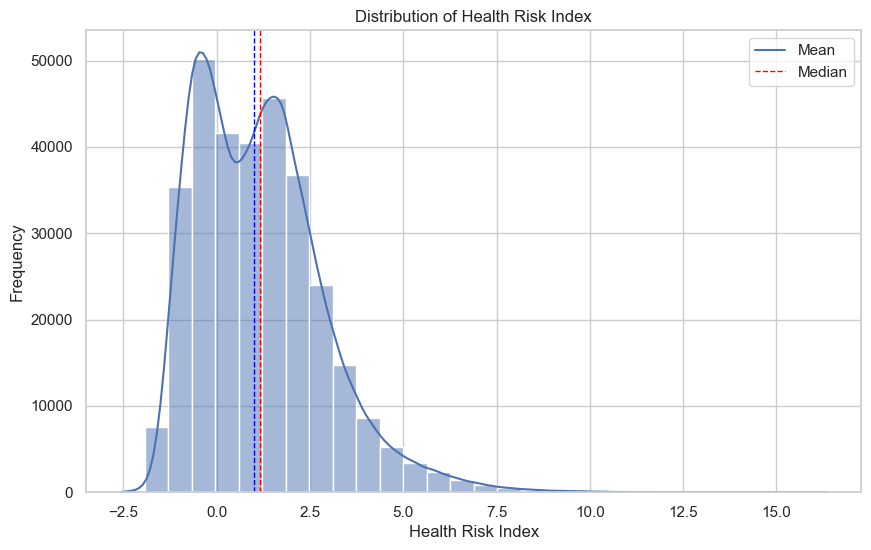

In [58]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['HealthRiskIndex'], bins=30, kde=True)
plt.title('Distribution of Health Risk Index')
plt.xlabel('Health Risk Index')
plt.ylabel('Frequency')
plt.axvline(df['HealthRiskIndex'].mean(), color='red', linestyle='dashed', linewidth=1)  
plt.axvline(df['HealthRiskIndex'].median(), color='blue', linestyle='dashed', linewidth=1)  
plt.legend({'Mean': df['HealthRiskIndex'].mean(), 'Median': df['HealthRiskIndex'].median()})
plt.show()


C:\Users\ruthi\AppData\Local\Temp\ipykernel_7140\1165810540.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='HeartDisease', y='HealthRiskIndex', palette='Set2')


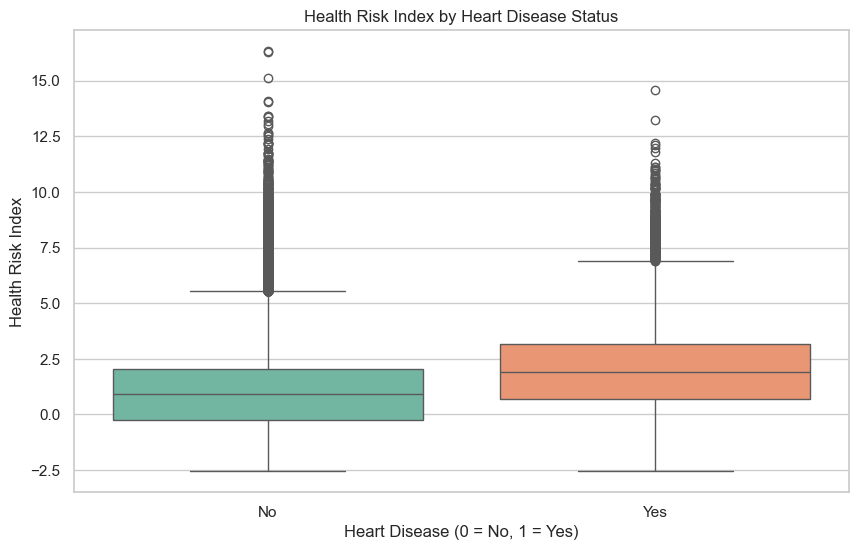

In [59]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='HeartDisease', y='HealthRiskIndex', palette='Set2')
plt.title('Health Risk Index by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Health Risk Index')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [60]:
print("Columns in the DataFrame:")
print(df.columns.tolist())


Columns in the DataFrame:
['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer', 'Overweight', 'PoorPhysicalHealth', 'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor', 'GenHealth_Very good', 'BMI_PhysicalActivity', 'Age_25-29', 'Age_30-34', 'Age_35-39', 'Age_40-44', 'Age_45-49', 'Age_50-54', 'Age_55-59', 'Age_60-64', 'Age_65-69', 'Age_70-74', 'Age_75-79', 'Age_80 or older', 'Age_25-29_PhysicalActivity', 'Age_30-34_PhysicalActivity', 'Age_35-39_PhysicalActivity', 'Age_40-44_PhysicalActivity', 'Age_45-49_PhysicalActivity', 'Age_50-54_PhysicalActivity', 'Age_55-59_PhysicalActivity', 'Age_60-64_PhysicalActivity', 'Age_65-69_PhysicalActivity', 'Age_70-74_PhysicalActivity', 'Age_75-79_PhysicalActivity', 'Age_80 or older_PhysicalActivity', 'HealthRiskIndex']


C:\Users\ruthi\AppData\Local\Temp\ipykernel_7140\1628304305.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dag_pc = from_pandas(df_clean.corr())


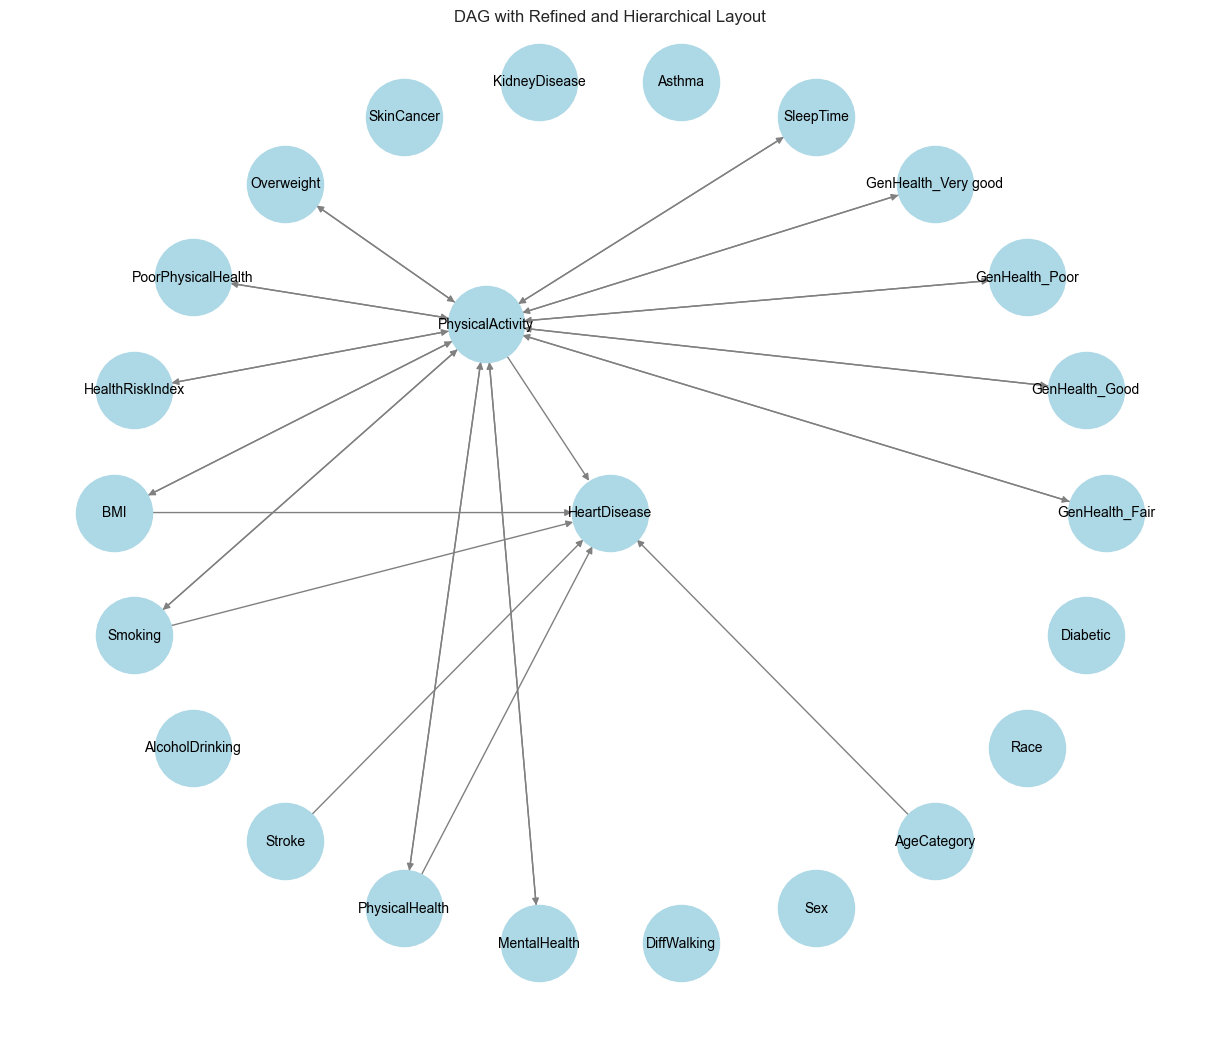

All edges in the DAG:
('BMI', 'PhysicalActivity')
('BMI', 'HeartDisease')
('Smoking', 'PhysicalActivity')
('Smoking', 'HeartDisease')
('Stroke', 'HeartDisease')
('PhysicalHealth', 'PhysicalActivity')
('PhysicalHealth', 'HeartDisease')
('MentalHealth', 'PhysicalActivity')
('AgeCategory', 'HeartDisease')
('PhysicalActivity', 'BMI')
('PhysicalActivity', 'Smoking')
('PhysicalActivity', 'PhysicalHealth')
('PhysicalActivity', 'MentalHealth')
('PhysicalActivity', 'GenHealth_Fair')
('PhysicalActivity', 'GenHealth_Good')
('PhysicalActivity', 'GenHealth_Poor')
('PhysicalActivity', 'GenHealth_Very good')
('PhysicalActivity', 'SleepTime')
('PhysicalActivity', 'Overweight')
('PhysicalActivity', 'PoorPhysicalHealth')
('PhysicalActivity', 'HealthRiskIndex')
('PhysicalActivity', 'HeartDisease')
('GenHealth_Fair', 'PhysicalActivity')
('GenHealth_Good', 'PhysicalActivity')
('GenHealth_Poor', 'PhysicalActivity')
('GenHealth_Very good', 'PhysicalActivity')
('SleepTime', 'PhysicalActivity')
('Overweight', 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure

variables = [
    "HeartDisease", "BMI", "Smoking", "AlcoholDrinking", "Stroke", "PhysicalHealth",
    "MentalHealth", "DiffWalking", "Sex", "AgeCategory", "Race", "Diabetic", 
    "PhysicalActivity", "GenHealth_Fair", "GenHealth_Good", 
    "GenHealth_Poor", "GenHealth_Very good", "SleepTime", "Asthma", "KidneyDisease", "SkinCancer",
    "Overweight", "PoorPhysicalHealth", "HealthRiskIndex"
]
df_clean = df[variables]
dag_pc = from_pandas(df_clean.corr())  
pruned_dag = nx.DiGraph()  

for node in variables:
    pruned_dag.add_node(node)
for edge in dag_pc.edges():
    if 'PhysicalActivity' in edge or 'HeartDisease' in edge:
        pruned_dag.add_edge(edge[0], edge[1])
if pruned_dag.has_edge('HeartDisease', 'PhysicalActivity'):
    pruned_dag.remove_edge('HeartDisease', 'PhysicalActivity')
pruned_dag.add_edge('PhysicalActivity', 'HeartDisease')  

for node in ['BMI', 'Smoking', 'PhysicalHealth', 'AgeCategory', 'Stroke']:
    if not pruned_dag.has_edge(node, 'HeartDisease'):
        pruned_dag.add_edge(node, 'HeartDisease')
plt.figure(figsize=(12, 10))

pos = nx.shell_layout(
    pruned_dag,
    nlist=[
        ["HeartDisease"],  
        ["PhysicalActivity"], 
        [node for node in pruned_dag.nodes if node not in ["HeartDisease", "PhysicalActivity"]]  
    ]
)

nx.draw(
    pruned_dag,
    pos,
    with_labels=True,
    node_size=3000,
    node_color="lightblue",
    font_size=10,
    font_color="black",
    edge_color="gray"
)

plt.title("DAG with Refined and Hierarchical Layout")
plt.show()
print("All edges in the DAG:")
for edge in pruned_dag.edges():
    print(edge)

treatment = "PhysicalActivity"
outcome = "HeartDisease"
confounders = []
for node in pruned_dag.nodes():
    if pruned_dag.has_edge(node, treatment) and pruned_dag.has_edge(node, outcome):
        confounders.append(node)

if confounders:
    print("\nIdentified Confounders:")
    print(confounders)
else:
    print("\nNo Confounders identified in the DAG.")
direct_effects = [node for node in pruned_dag.nodes() if pruned_dag.has_edge(node, 'HeartDisease')]
indirect_effects = [node for node in pruned_dag.nodes() if pruned_dag.has_edge(node, 'PhysicalActivity') and pruned_dag.has_edge('PhysicalActivity', 'HeartDisease')]




In [62]:
data = pd.read_csv('preprocessed_data.csv')
encoded_data = data.copy()

label_cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
              'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
              'KidneyDisease', 'SkinCancer']

for col in label_cols:
    if col in encoded_data.columns:
        encoder = LabelEncoder()
        encoded_data[col] = encoder.fit_transform(encoded_data[col])

confounders = ['Smoking', 'BMI', 'PhysicalHealth']
treatment = 'PhysicalActivity'
outcome = 'HeartDisease'

X = encoded_data[confounders]
y = encoded_data[treatment]
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X, y)
encoded_data['propensity_score'] = log_reg.predict_proba(X)[:, 1]

encoded_data['IPTW'] = encoded_data.apply(
    lambda row: 1 / row['propensity_score'] if row[treatment] == 1 else 1 / (1 - row['propensity_score']), axis=1
)
print(encoded_data[['PhysicalActivity', 'propensity_score', 'IPTW']].head())


   PhysicalActivity  propensity_score      IPTW
0                 1          0.841293  1.188646
1                 1          0.882339  1.133351
2                 1          0.578615  1.728266
3                 0          0.862303  7.262346
4                 1          0.598316  1.671357


In [63]:
X_iptw = sm.add_constant(encoded_data[['PhysicalActivity']])
y_iptw = encoded_data['HeartDisease']
weighted_model = sm.WLS(y_iptw, X_iptw, weights=encoded_data['IPTW']).fit()
print(weighted_model.summary())
ate_iptw = weighted_model.params['PhysicalActivity']
print(f"ATE (IPTW): {ate_iptw}")


                            WLS Regression Results                            
Dep. Variable:           HeartDisease   R-squared:                       0.004
Model:                            WLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1141.
Date:                Mon, 09 Dec 2024   Prob (F-statistic):          1.06e-249
Time:                        01:58:58   Log-Likelihood:                -90932.
No. Observations:              319795   AIC:                         1.819e+05
Df Residuals:                  319793   BIC:                         1.819e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1121      0.001  

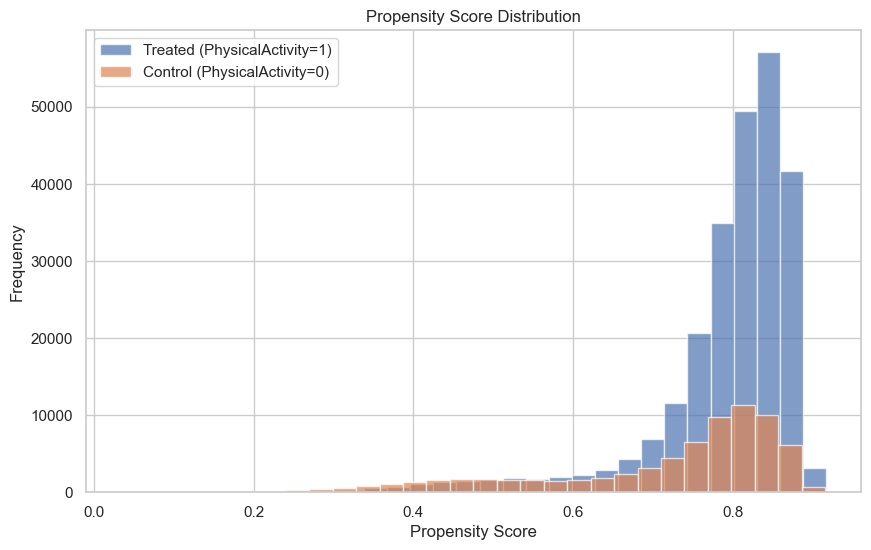

In [64]:
assert 'PhysicalActivity' in encoded_data.columns, "PhysicalActivity column is missing."
assert 'propensity_score' in encoded_data.columns, "propensity_score column is missing."

plt.figure(figsize=(10, 6))
plt.hist(
    encoded_data[encoded_data['PhysicalActivity'] == 1]['propensity_score'], 
    bins=30, alpha=0.7, label='Treated (PhysicalActivity=1)'
)
plt.hist(
    encoded_data[encoded_data['PhysicalActivity'] == 0]['propensity_score'], 
    bins=30, alpha=0.7, label='Control (PhysicalActivity=0)'
)
plt.xlabel('Propensity Score')
plt.ylabel('Frequency')
plt.title('Propensity Score Distribution')
plt.legend()
plt.show()


In [65]:
treated = encoded_data[encoded_data['PhysicalActivity'] == 1]
control = encoded_data[encoded_data['PhysicalActivity'] == 0]

nn = NearestNeighbors(n_neighbors=1)
nn.fit(control[['propensity_score']])
distances, indices = nn.kneighbors(treated[['propensity_score']])
matched_control = control.iloc[indices.flatten()]
matched_data = pd.concat([treated, matched_control])

ate_psm = (
    matched_data['HeartDisease'][matched_data['PhysicalActivity'] == 1].mean()
    - matched_data['HeartDisease'][matched_data['PhysicalActivity'] == 0].mean()
)
print(f"ATE (PSM): {ate_psm}")


ATE (PSM): -0.03726452570405352


In [66]:
causal_model = CausalModel(
    data=encoded_data,
    treatment='PhysicalActivity',
    outcome='HeartDisease',
    common_causes=confounders 
)
identified_estimand = causal_model.identify_effect()
print("Identified Estimand:")
print(identified_estimand)
ate_backdoor = causal_model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)
print("ATE (Backdoor Adjustment):", ate_backdoor.value)
print(ate_backdoor)


Identified Estimand:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                                     
───────────────────(E[HeartDisease|Smoking,BMI,PhysicalHealth])
d[PhysicalActivity]                                            
Estimand assumption 1, Unconfoundedness: If U→{PhysicalActivity} and U→HeartDisease then P(HeartDisease|PhysicalActivity,Smoking,BMI,PhysicalHealth,U) = P(HeartDisease|PhysicalActivity,Smoking,BMI,PhysicalHealth)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

ATE (Backdoor Adjustment): -0.03625517568168424
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                                     
───────────────────(E[HeartDisease|Smoking,BMI,PhysicalHealth]

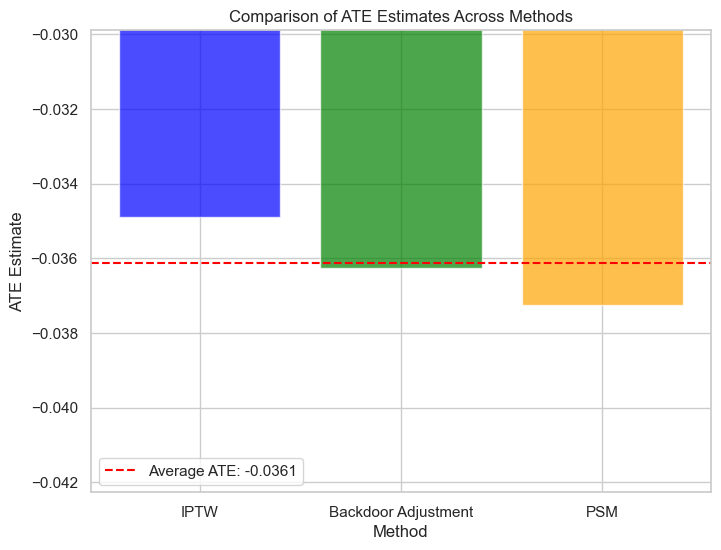

In [67]:
ate_iptw = weighted_model.params['PhysicalActivity']  
ate_backdoor = ate_backdoor.value  
ate_psm = (
    matched_data['HeartDisease'][matched_data['PhysicalActivity'] == 1].mean()
    - matched_data['HeartDisease'][matched_data['PhysicalActivity'] == 0].mean()
)  

methods = ['IPTW', 'Backdoor Adjustment', 'PSM']
ate_values = [ate_iptw, ate_backdoor, ate_psm]
average_ate = sum(ate_values) / len(ate_values)

plt.figure(figsize=(8, 6))
plt.bar(methods, ate_values, color=['blue', 'green', 'orange'], alpha=0.7)
plt.axhline(average_ate, color='red', linestyle='--', label=f"Average ATE: {average_ate:.4f}")
plt.xlabel('Method')
plt.ylabel('ATE Estimate')
plt.title('Comparison of ATE Estimates Across Methods')
plt.ylim(min(ate_values) - 0.005, max(ate_values) + 0.005)
plt.legend()
plt.show()


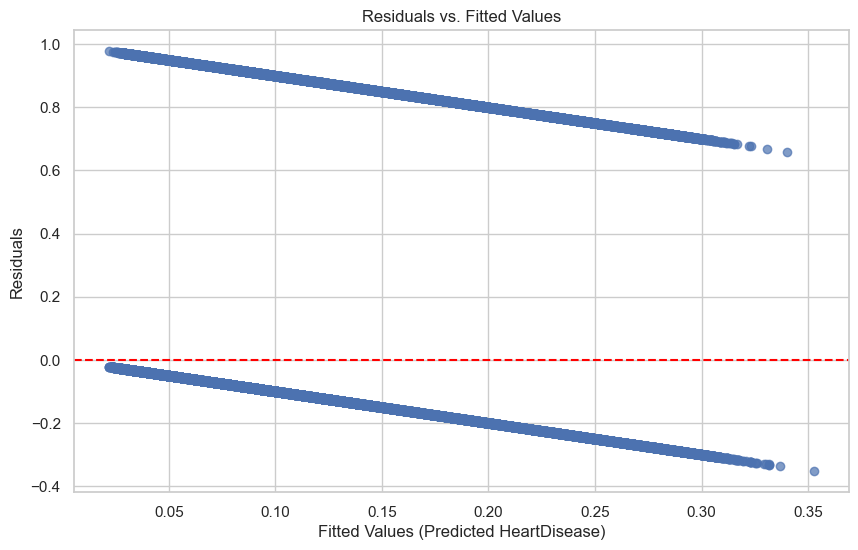

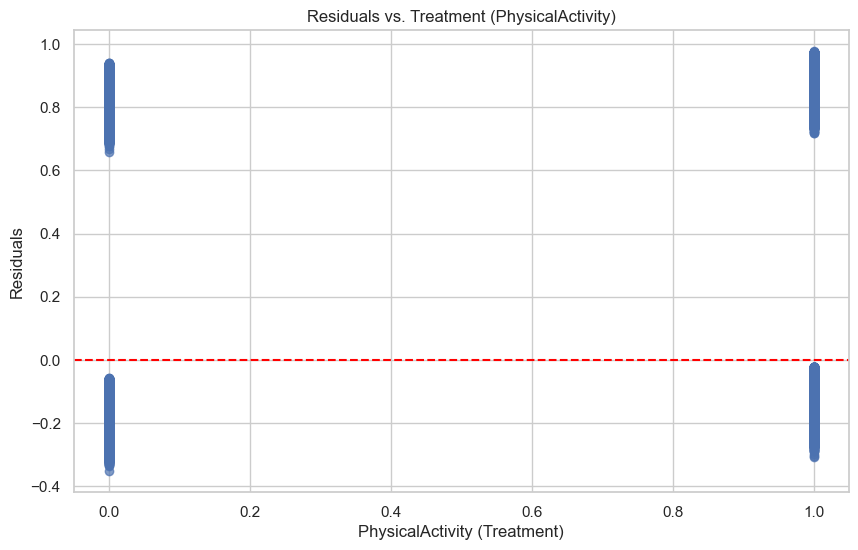

In [68]:
X = sm.add_constant(encoded_data[confounders + ['PhysicalActivity']])
y = encoded_data['HeartDisease']
model = sm.OLS(y, X).fit()
fitted_values = model.predict(X)
residuals = y - fitted_values

plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values (Predicted HeartDisease)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(encoded_data['PhysicalActivity'], residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('PhysicalActivity (Treatment)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Treatment (PhysicalActivity)')
plt.show()


In [69]:
def compute_smd(data, treatment, confounders, weight_column=None):
    smd = {}
    for conf in confounders:
        treated = data[data[treatment] == 1][conf]
        control = data[data[treatment] == 0][conf]

        if weight_column:
            treated_mean = np.average(treated, weights=data[data[treatment] == 1][weight_column])
            control_mean = np.average(control, weights=data[data[treatment] == 0][weight_column])
        else:
            treated_mean = treated.mean()
            control_mean = control.mean()

        pooled_std = np.sqrt(((treated.var() + control.var()) / 2))
        smd[conf] = abs(treated_mean - control_mean) / pooled_std

    return smd

smd_before = compute_smd(encoded_data, 'PhysicalActivity', confounders)
smd_after = compute_smd(encoded_data, 'PhysicalActivity', confounders, weight_column='IPTW')

print("SMD Before Weighting:", smd_before)
print("SMD After Weighting:", smd_after)


SMD Before Weighting: {'Smoking': 0.23224236112656058, 'BMI': 0.3414623307995765, 'PhysicalHealth': 0.4897214320514839}
SMD After Weighting: {'Smoking': 0.009485440602721308, 'BMI': 0.003667263528033765, 'PhysicalHealth': 0.001744281679473529}


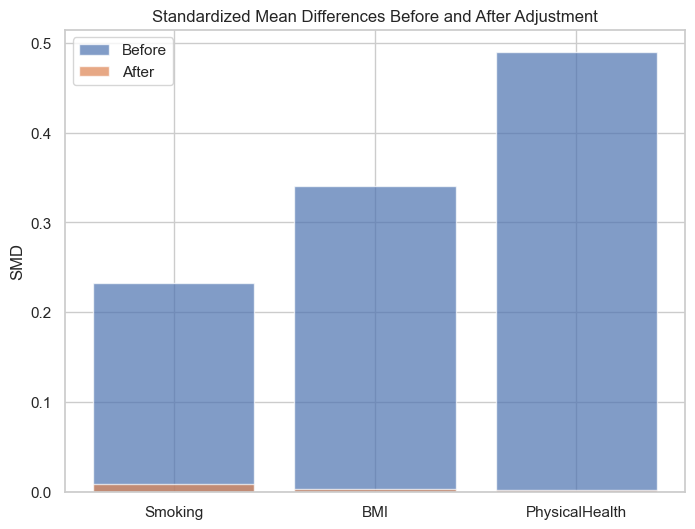

In [70]:
smd_before = [0.232, 0.341, 0.490]
smd_after = [0.009, 0.003, 0.002]
labels = ['Smoking', 'BMI', 'PhysicalHealth']

plt.figure(figsize=(8, 6))
plt.bar(labels, smd_before, alpha=0.7, label='Before')
plt.bar(labels, smd_after, alpha=0.7, label='After')
plt.ylabel('SMD')
plt.title('Standardized Mean Differences Before and After Adjustment')
plt.legend()
plt.show()


In [71]:
X = sm.add_constant(encoded_data[['PhysicalActivity']])
y = encoded_data['HeartDisease']
weights = encoded_data['IPTW']

weighted_model = sm.WLS(y, X, weights=weights).fit()
print(weighted_model.summary())

ate_iptw = weighted_model.params['PhysicalActivity']
print(f"ATE (IPTW): {ate_iptw}")


                            WLS Regression Results                            
Dep. Variable:           HeartDisease   R-squared:                       0.004
Model:                            WLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1141.
Date:                Mon, 09 Dec 2024   Prob (F-statistic):          1.06e-249
Time:                        01:59:05   Log-Likelihood:                -90932.
No. Observations:              319795   AIC:                         1.819e+05
Df Residuals:                  319793   BIC:                         1.819e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1121      0.001  

In [72]:
print(type(ate_backdoor))  


<class 'numpy.float64'>


In [73]:
ate_backdoor = causal_model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)


In [74]:
refute_random = causal_model.refute_estimate(
    identified_estimand, ate_backdoor, method_name="random_common_cause"
)
print(refute_random)

refute_placebo = causal_model.refute_estimate(
    identified_estimand, ate_backdoor, method_name="placebo_treatment_refuter"
)
print(refute_placebo)

refute_subset = causal_model.refute_estimate(
    identified_estimand, ate_backdoor, method_name="data_subset_refuter"
)
print(refute_subset)


Refute: Add a random common cause
Estimated effect:-0.03625517568168424
New effect:-0.03625534465821016
p value:0.98

Refute: Use a Placebo Treatment
Estimated effect:-0.03625517568168424
New effect:-1.0963632758031195e-05
p value:0.8999999999999999

Refute: Use a subset of data
Estimated effect:-0.03625517568168424
New effect:-0.036182890814119704
p value:0.8400000000000001



In [75]:
def bootstrap_ate(data, treatment, outcome, confounders, n_bootstrap=1000):
    """
    Perform bootstrapping to calculate confidence intervals for ATE and return bootstrapped ATEs.
    """
    bootstrapped_ates = []
    
    for _ in range(n_bootstrap):
        bootstrap_sample = data.sample(frac=1, replace=True)
        X = sm.add_constant(bootstrap_sample[[treatment] + confounders])  
        y = bootstrap_sample[outcome]
        model = sm.OLS(y, X).fit()
        bootstrapped_ates.append(model.params[treatment])
    lower_bound, upper_bound = np.percentile(bootstrapped_ates, [2.5, 97.5])
    
    return np.mean(bootstrapped_ates), (lower_bound, upper_bound), bootstrapped_ates



Mean ATE: -0.03620115685775848
95% Confidence Interval: (-0.038713320668926604, -0.033611325674723386)


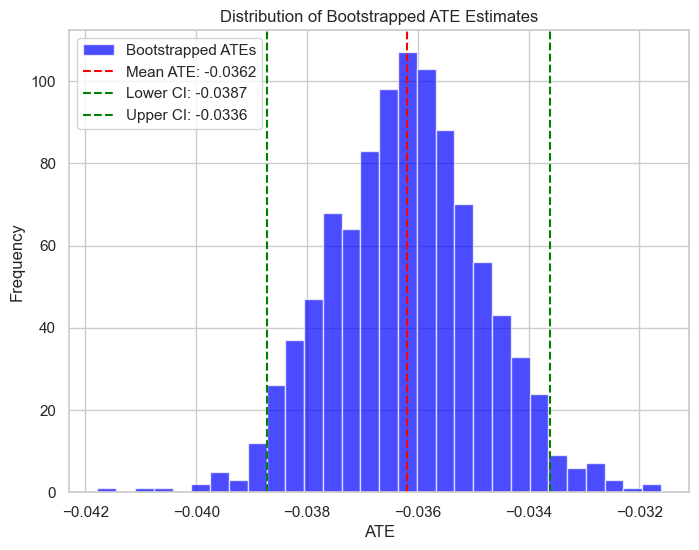

In [76]:
confounders = ['Smoking', 'BMI', 'PhysicalHealth'] 
ate_mean, ci, bootstrapped_ates = bootstrap_ate(encoded_data, treatment='PhysicalActivity', outcome='HeartDisease', confounders=confounders)

print(f"Mean ATE: {ate_mean}")
print(f"95% Confidence Interval: {ci}")

plt.figure(figsize=(8, 6))
plt.hist(bootstrapped_ates, bins=30, alpha=0.7, color='blue', label='Bootstrapped ATEs')
plt.axvline(ate_mean, color='red', linestyle='--', label=f"Mean ATE: {ate_mean:.4f}")
plt.axvline(ci[0], color='green', linestyle='--', label=f"Lower CI: {ci[0]:.4f}")
plt.axvline(ci[1], color='green', linestyle='--', label=f"Upper CI: {ci[1]:.4f}")
plt.title("Distribution of Bootstrapped ATE Estimates")
plt.xlabel("ATE")
plt.ylabel("Frequency")
plt.legend()
plt.show()


HTE Estimation using S-learner ( meta learners)

We're removing a couple of redundant columns created during feature engineering

In [77]:
df = pd.read_csv('preprocessed_data.csv')

genhealth_columns = [col for col in df.columns if 'GenHealth' in col]

columns_to_retain = [
    'HeartDisease', 'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime',
    'Smoking', 'PhysicalActivity', 'AgeCategory', 'Race', 'Sex', 'Diabetic',
    'HealthRiskIndex'
] + genhealth_columns


df_cleaned = df[columns_to_retain]
df_cleaned['HeartDisease'] = df_cleaned['HeartDisease'].apply(lambda x: 1 if x == 'Yes' else 0)

categorical_columns = ['AgeCategory', 'Race', 'Sex', 'Diabetic']
for col in categorical_columns:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].astype('category').cat.codes


C:\Users\ruthi\AppData\Local\Temp\ipykernel_7140\311557539.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['HeartDisease'] = df_cleaned['HeartDisease'].apply(lambda x: 1 if x == 'Yes' else 0)
C:\Users\ruthi\AppData\Local\Temp\ipykernel_7140\311557539.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype('category').cat.codes
C:\Users\ruthi\AppData\Local\Temp\ipykernel_7140\311557539.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy 

Random Forest Regression Model used 

In [78]:
X = df_cleaned.drop(columns=['HeartDisease'])
T = df_cleaned['PhysicalActivity']  
Y = df_cleaned['HeartDisease']      

X['Treatment'] = T

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 0.0794


In [79]:
X_test_treated = X_test.copy()
X_test_control = X_test.copy()
X_test_treated['Treatment'] = 1 
X_test_control['Treatment'] = 0 
X_test = X_test.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)
Y_treated_pred = model.predict(X_test.assign(Treatment=1))
Y_control_pred = model.predict(X_test.assign(Treatment=0))


HTE = Y_treated_pred - Y_control_pred
ATE = np.mean(HTE)
X_test['HTE'] = HTE


ERMSE calculated

In [80]:
def calculate_ermse(true_outcomes, predicted_outcomes):
    return np.sqrt(mean_squared_error(true_outcomes, predicted_outcomes))

treated_indices = X_test['Treatment'] == 1
control_indices = X_test['Treatment'] == 0
treated_outcomes = Y_test[treated_indices]
control_outcomes = Y_test[control_indices]
ermse_treated = calculate_ermse(treated_outcomes, Y_treated_pred[treated_indices])
ermse_control = calculate_ermse(control_outcomes, Y_control_pred[control_indices])
overall_ermse = (ermse_treated + ermse_control) / 2

print(f"ERMSE for Treated Group: {ermse_treated:.4f}")
print(f"ERMSE for Control Group: {ermse_control:.4f}")
print(f"Overall ERMSE: {overall_ermse:.4f}")
print(f"ATE (from S-Learner): {ATE}")

ERMSE for Treated Group: 0.2621
ERMSE for Control Group: 0.3407
Overall ERMSE: 0.3014
ATE (from S-Learner): -0.0020596003528378223


The SHAP Summary Plot helps explain which features contribute to these HTE predictions, offering interpretability.
The HTE Distribution Plot shows the overall spread and variability of HTE values across the population, with the red dashed line indicating the ATE.

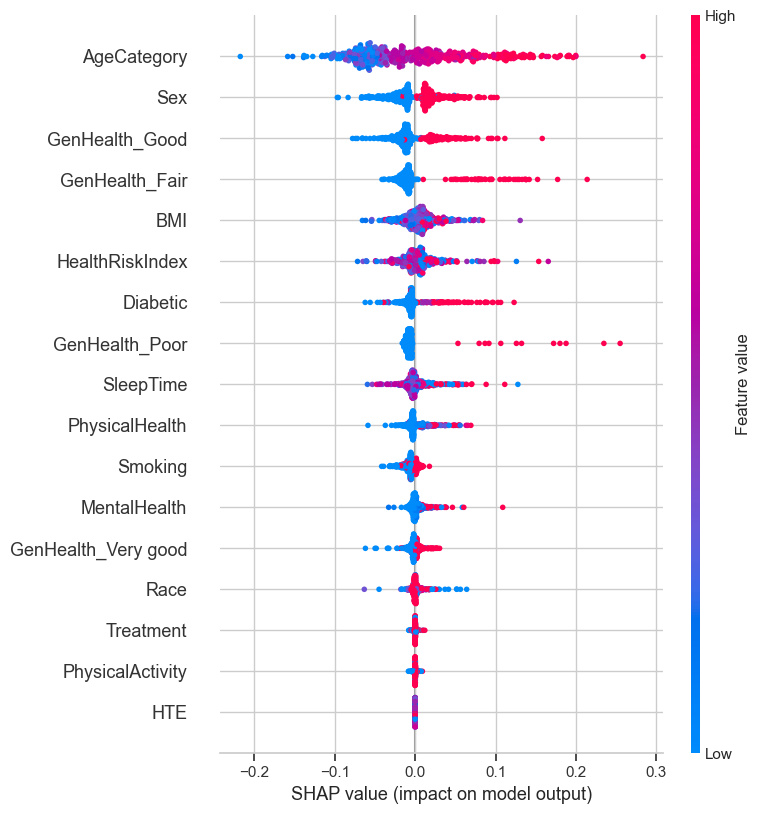

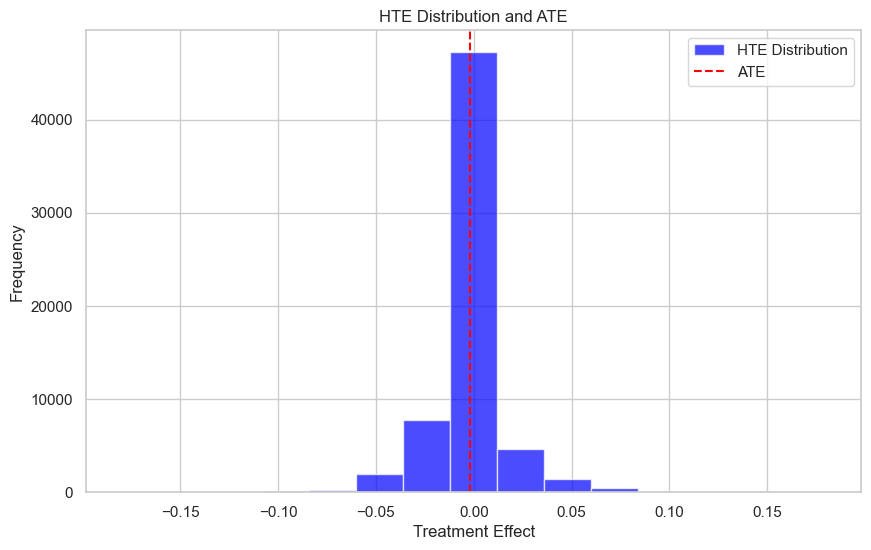

In [81]:
explainer = shap.TreeExplainer(model)
X_test_sample = X_test.sample(n=500, random_state=42)
shap_values = explainer.shap_values(X_test_sample)

shap.summary_plot(shap_values, X_test_sample)

plt.figure(figsize=(10, 6))
plt.hist(HTE, bins=15, alpha=0.7, color='blue', label='HTE Distribution')
plt.axvline(x=ATE, color='red', linestyle='--', label='ATE')
plt.title("HTE Distribution and ATE")
plt.xlabel("Treatment Effect")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [82]:
hte_mean = np.mean(HTE)  
hte_std = np.std(HTE) 
hte_min = np.min(HTE)  
hte_max = np.max(HTE)  

print(f"HTE Summary:")
print(f"Mean (ATE): {hte_mean}")
print(f"Standard Deviation: {hte_std}")
print(f"Minimum HTE: {hte_min}")
print(f"Maximum HTE: {hte_max}")

hte_df = X_test[['HTE']].copy()
hte_df.to_csv('HTE_values.csv', index=False)
print("HTE values exported to 'HTE_values.csv'")


HTE Summary:
Mean (ATE): -0.0020596003528378223
Standard Deviation: 0.01806664570009484
Minimum HTE: -0.18
Maximum HTE: 0.17999999999999994
HTE values exported to 'HTE_values.csv'
